In [1]:
import pandas as pd

# read file into pandas using a relative path
path = "D:\ML Internship\sms.tsv"
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [2]:
#Some preprocessing needs to be done before we start extracting features.

# Making everything lower case 
sms['message'] = sms['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [3]:
# Removing Punctuation

sms['message'] = sms['message'].str.replace('[^\w\s]','')

In [4]:
from nltk.corpus import stopwords

In [5]:
#Removing stopwords

stop = stopwords.words('english')
sms['message'] = sms['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [7]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
sms['message'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
5       freemsg hey darl 3 week word back id like fun ...
6           even brother like speak treat like aid patent
7       per request mell mell oru minnaminungint nurun...
8       winner valu network custom select receivea 900...
9       mobil 11 month u r entitl updat latest colour ...
10      im gonna home soon dont want talk stuff anymor...
11      six chanc win cash 100 20000 pound txt csh11 s...
12      urgent 1 week free membership 100000 prize jac...
13      ive search right word thank breather promis wo...
14                                            date sunday
15      xxxmobilemovieclub use credit click wap link n...
16                                           oh kim watch
17       eh u 

In [6]:
# Rare words removal

freq = pd.Series(' '.join(sms['message']).split()).value_counts()[-10:]

In [7]:
freq = list(freq.index)
sms['message'] = sms['message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [8]:
X = sms.message
y = sms.label

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [10]:
from sklearn.feature_extraction.text import HashingVectorizer

# create the transform
vectorizer = HashingVectorizer(n_features=1000)
# encode document
train_vector = vectorizer.fit_transform(X_train)
# summarize encoded vector
print(train_vector.shape)

(4179, 1000)


In [11]:
test_vector = vectorizer.transform(X_test)
print(test_vector.shape)

(1393, 1000)


In [17]:
# Now we have processed the text to make it useful for running further classification or Regression algorithms

# import and instantiate a Linear Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [18]:
# train the model using train_vector
%time logreg.fit(train_vector, y_train)

Wall time: 796 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
y_pred_class = logreg.predict(test_vector)

In [22]:
from sklearn import metrics
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9576453697056713

In [23]:
#Using K nearest neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

In [25]:
k_range = range(1,26)
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_vector,y_train)
    y_pred = knn.predict(test_vector)
    scores.append(metrics.accuracy_score(y_test,y_pred))

In [27]:
print(scores)

[0.9483129935391242, 0.9253409906676239, 0.9246231155778895, 0.9167264895908112, 0.9167264895908112, 0.9059583632447954, 0.9059583632447954, 0.8951902368987796, 0.8951902368987796, 0.8880114860014358, 0.8880114860014358, 0.8837042354630295, 0.8837042354630295, 0.8765254845656856, 0.8765254845656856, 0.873653984206748, 0.9038047379755922, 0.9009332376166547, 0.9117013639626705, 0.9038047379755922, 0.9081119885139985, 0.905240488155061, 0.908829863603733, 0.9045226130653267, 0.9102656137832017]


Text(0,0.5,'Testing accuracy')

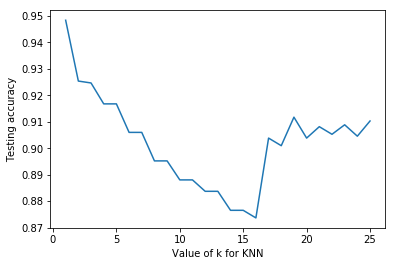

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(k_range, scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing accuracy")

In [29]:
# Let's choose k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_vector,y_train)
y_pred = knn.predict(test_vector)
metrics.accuracy_score(y_test,y_pred)

0.9246231155778895